In [2]:
#Basic import
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd   
import seaborn as sns  

In [3]:
df=pd.read_csv('Data/StudentsPerformance.csv')
display(df.sample(10))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
911,female,group A,some college,standard,none,69,84,82
270,male,group C,bachelor's degree,standard,none,69,63,61
667,female,group B,bachelor's degree,free/reduced,none,77,85,87
815,male,group B,some high school,standard,completed,94,86,87
562,male,group C,bachelor's degree,standard,completed,96,90,92
623,male,group A,some college,standard,completed,100,96,86
907,female,group D,some college,standard,completed,79,84,91
494,female,group B,high school,standard,none,54,64,68
644,male,group B,high school,standard,none,70,65,60
2,female,group B,master's degree,standard,none,90,95,93


In [4]:
#column rename
df.rename(columns={'race/ethnicity':'race_ethnicity',
                'parental level of education':'parental_education',
                'test preparation course':'test_prep_course',
                'math score':'math_score',
                'reading score':'reading_score',
                'writing score':'writing_score'
                }, inplace=True)

display(df.columns)

Index(['gender', 'race_ethnicity', 'parental_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

Data Checks to perform
- Check missing values
- check duplicates
- check datatype
- check the number of unique values of each column 
- check statistics of data set
- check various categories present in the different categorical columns

In [5]:
#missing values
df.isnull().sum()

gender                0
race_ethnicity        0
parental_education    0
lunch                 0
test_prep_course      0
math_score            0
reading_score         0
writing_score         0
dtype: int64

In [6]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

In [7]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race_ethnicity      1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_prep_course    1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [9]:
for col in df.columns:
    print(f"The unique values of the column '{col}' are:")
    print(df[col].unique())
    print()  


The unique values of the column 'gender' are:
['female' 'male']

The unique values of the column 'race_ethnicity' are:
['group B' 'group C' 'group A' 'group D' 'group E']

The unique values of the column 'parental_education' are:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

The unique values of the column 'lunch' are:
['standard' 'free/reduced']

The unique values of the column 'test_prep_course' are:
['none' 'completed']

The unique values of the column 'math_score' are:
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

The unique values of the column 'reading_score' are:
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58


In [10]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=round(df['total_score']/3,3)
display(df.sample(5))

,gender,race_ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,avg_score
865,male,group D,some college,standard,completed,82,82,88,252,84.000
167,female,group B,master's degree,free/reduced,completed,58,76,78,212,70.667
364,male,group C,some college,standard,none,59,60,58,177,59.000
23,female,group C,some high school,standard,none,69,73,73,215,71.667
981,male,group D,some high school,standard,none,81,78,78,237,79.000


<Axes: xlabel='avg_score', ylabel='Count'>

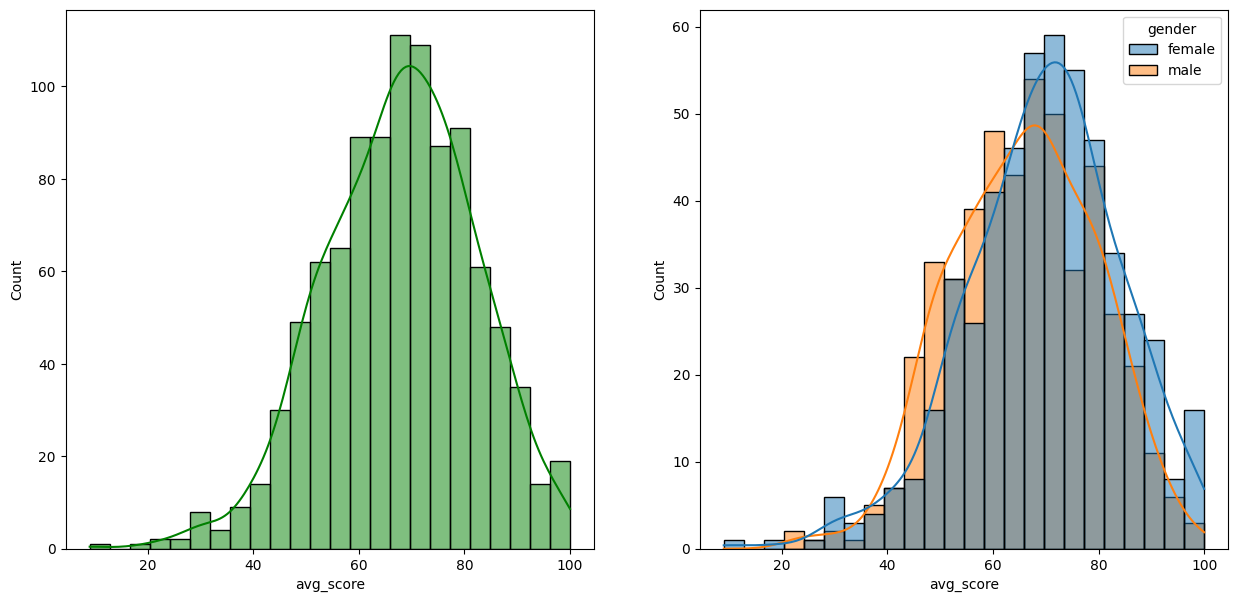

In [11]:
#histogram
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='avg_score',kde=True,color='g')

plt.subplot(1,2,2)
sns.histplot(data=df,x='avg_score',kde=True,color='r', hue='gender')


In [12]:
df.to_csv('StudentPerformance2.csv', index=False)